# Machine Learning Security Final Project - Part 1

## Overview
This notebook demonstrates a comprehensive machine learning security analysis covering training-time attacks (data poisoning) and inference-time attacks (adversarial examples). The project implements and analyzes various attack and defense mechanisms in machine learning systems.

## Project Structure
- **Phase 1**: Data Preprocessing and Setup
- **Phase 2**: Clean Model Training and Evaluation  
- **Phase 3**: Training-Time Attacks (Data Poisoning)
- **Phase 4**: Inference-Time Attacks (Adversarial Examples)
- **Phase 5**: Robustness Analysis and Evaluation

---

In [5]:
# =============================================================================
# PHASE 1: DATA PREPROCESSING AND SETUP
# =============================================================================

# 1.1 Import Required Libraries and Setup Environment
import numpy as np
import os, sys

# Configure Python path to import project modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import custom scripts
from scripts.preprocessing import load_dataset, preprocess_data, split_dataset, load_preprocessed_data
from scripts.visualize import plot_confusion_matrix, plot_training_history
from scripts.train import *

print("✓ Libraries and modules imported successfully")

✓ Libraries and modules imported successfully


In [6]:
# 1.2 Data Loading and Preprocessing
print("=== PHASE 1.2: DATA LOADING AND PREPROCESSING ===")

# Configure Python path to import project modules
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import scripts
from scripts.preprocessing import load_dataset, preprocess_data, split_dataset, load_preprocessed_data, save_preprocessed_data
from scripts.visualize import plot_confusion_matrix, plot_training_history

# Ensure the 'data' directory exists before loading or saving
if not os.path.exists('data'):
    os.makedirs('data')

# Load preprocessed data
data = load_preprocessed_data()
if data is not None:
    X_train, y_train, X_val, y_val, X_test, y_test = data
    print("✓ Preprocessed data loaded from disk.")
    print(f"  Train set: {X_train.shape[0]} samples | Validation set: {X_val.shape[0]} samples | Test set: {X_test.shape[0]} samples")
else:
    print("⚠ No preprocessed data found. Creating new data...")
    X, y = load_dataset()
    X_scaled = preprocess_data(X)
    X_train, y_train, X_val, y_val, X_test, y_test = split_dataset(X_scaled, y, test_size=0.3, val_size=0.2, random_state=42)
    print(f"✓ Loaded and preprocessed data: {X_train.shape[0]} training samples")
    print(f"  Validation set: {X_val.shape[0]} samples | Test set: {X_test.shape[0]} samples")

# Ensure the 'data' directory exists before saving
if not os.path.exists('data'):
    os.makedirs('data')

#save_preprocessed_data((X_train, y_train, X_val, y_val, X_test, y_test))

=== PHASE 1.2: DATA LOADING AND PREPROCESSING ===
✓ Preprocessed data loaded from disk.
  Train set: 34999 samples | Validation set: 14001 samples | Test set: 21000 samples


In [7]:
# =============================================================================
# PHASE 2: CLEAN MODEL TRAINING AND EVALUATION
# =============================================================================

# 2.1 Clean Model Training
print("=== PHASE 2.1: CLEAN MODEL TRAINING ===")

from tensorflow.keras.utils import to_categorical
from scripts.train import build_model, train_model, evaluate_model
from scripts.save_model import save_model_and_history

# One-hot encode the labels
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)
    
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Number of classes: {num_classes}")
    
# Build the model
print("\n🔧 Building neural network model...")
clean_model = build_model(X_train.shape[1], num_classes)
clean_model.summary()
    
# Train the model with early stopping
print("\n🚀 Training model with early stopping...")
history = train_model(clean_model, X_train, y_train_cat, X_val, y_val_cat)

# Save using utility
save_model_and_history(clean_model, history, save_name='clean_model')
print("✓ Clean model training completed and saved")

=== PHASE 2.1: CLEAN MODEL TRAINING ===
Training data shape: (34999, 784)
Validation data shape: (14001, 784)
Testing data shape: (21000, 784)
Number of classes: 10

🔧 Building neural network model...


c:\MachineLearningSecurityFinalProjectDirectory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)


🚀 Training model with early stopping...
Epoch 1/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8061 - loss: 0.6241 - val_accuracy: 0.9409 - val_loss: 0.1998
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9312 - loss: 0.2452 - val_accuracy: 0.9548 - val_loss: 0.1524
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9472 - loss: 0.1849 - val_accuracy: 0.9635 - val_loss: 0.1290
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9576 - loss: 0.1456 - val_accuracy: 0.9674 - val_loss: 0.1129
Epoch 5/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9639 - loss: 0.1254 - val_accuracy: 0.9702 - val_loss: 0.1088
Epoch 6/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9689 - loss: 0.1086 - val_accuracy: 0.9722 - val_loss: 0.1006
Epoch 7/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9711 - loss: 0.0975 - val_accuracy: 0.9741 - val_loss: 0.0973
Epoch 8/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy:

=== PHASE 2.2: CLEAN MODEL EVALUATION ===
📊 Evaluating clean model on test data...
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step
Test Accuracy: 0.9752

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2058
           1       0.99      0.98      0.99      2364
           2       0.96      0.98      0.97      2133
           3       0.96      0.98      0.97      2176
           4       0.97      0.98      0.97      1936
           5       0.98      0.96      0.97      1915
           6       0.99      0.98      0.98      2088
           7       0.98      0.98      0.98      2248
           8       0.97      0.95      0.96      1992
           9       0.97      0.96      0.96      2090

    accuracy                           0.98     21000
   macro avg       0.98      0.97      0.97     21000
weighted avg       0.98      0.98      0.98     21000

Confusion matrix saved to confusion_matrix.png


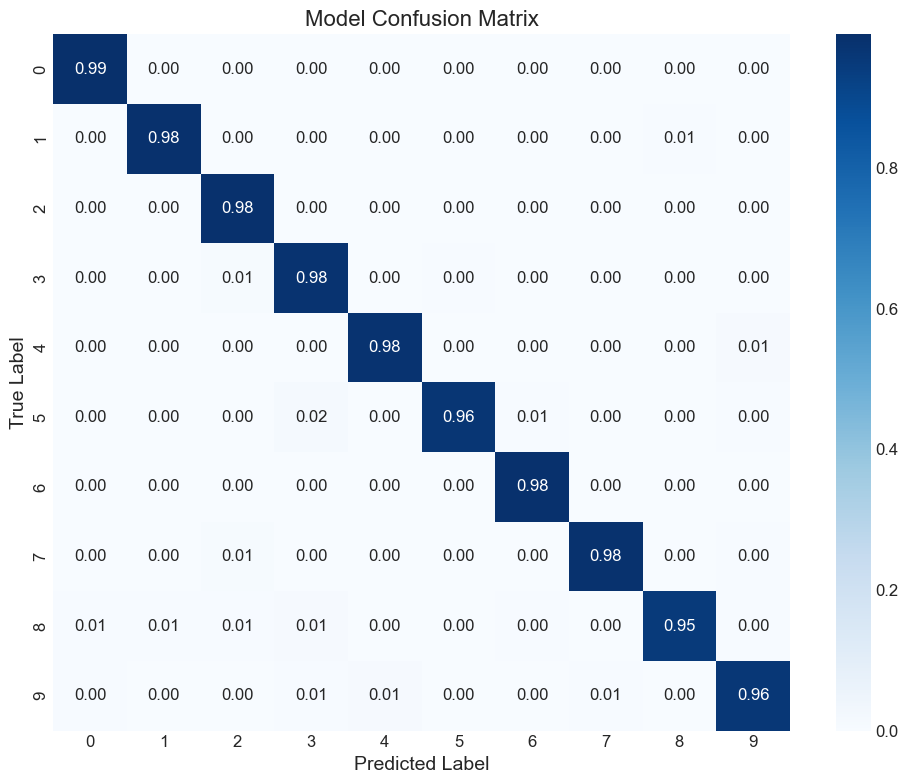

✓ Test accuracy: 0.9752

📈 Generating confusion matrix...
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step


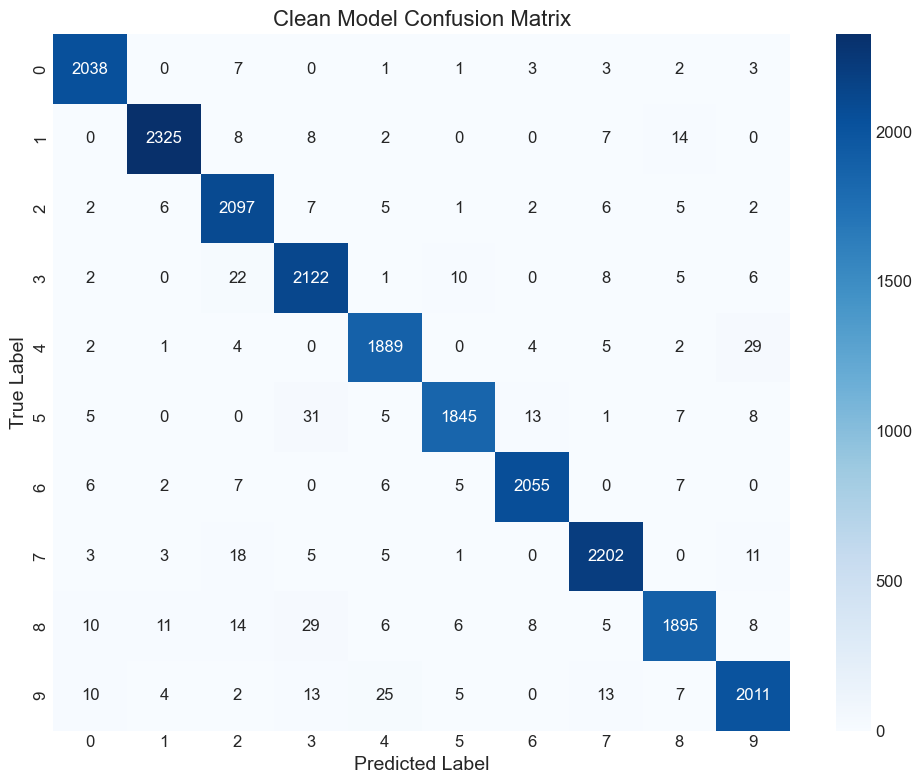

📈 Plotting training history...


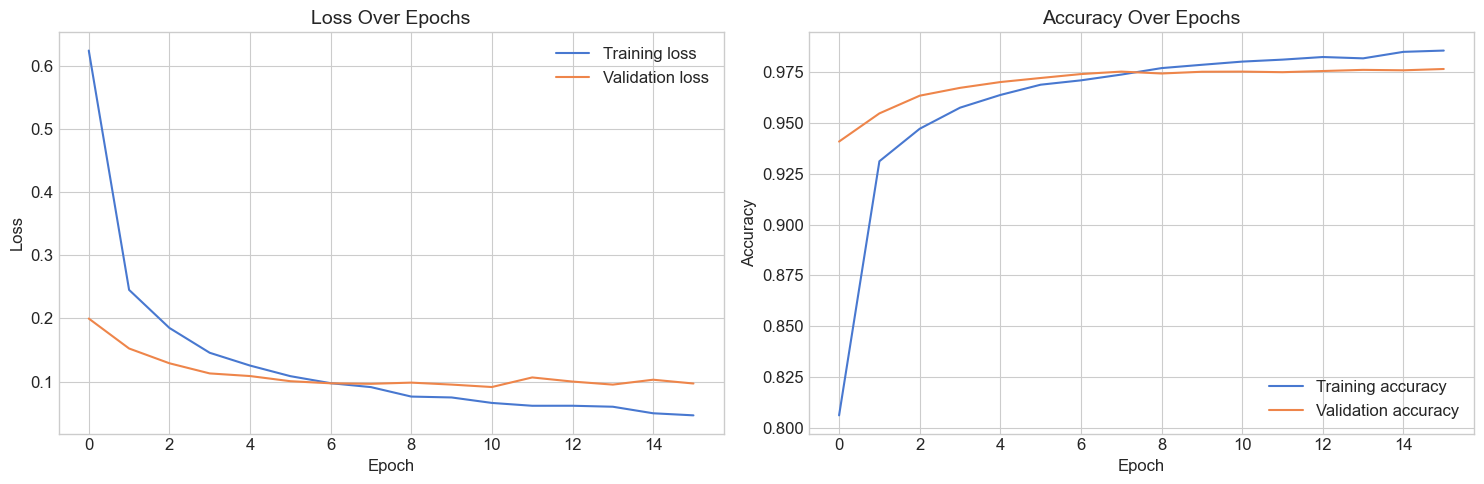

In [8]:
# 2.2 Clean Model Evaluation and Visualization
print("=== PHASE 2.2: CLEAN MODEL EVALUATION ===")

# Evaluate the clean model on test data
print("📊 Evaluating clean model on test data...")
results = evaluate_model(clean_model, X_test, y_test_cat)

# Access accuracy and loss from the dictionary
test_acc = results.get('accuracy', None)
test_loss = results.get('loss', None)
if test_acc is not None and test_loss is not None:
	print(f"✓ Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")
elif test_acc is not None:
	print(f"✓ Test accuracy: {test_acc:.4f}")
else:
	print("Test results:", results)

# Create a confusion matrix for the clean model
print("\n📈 Generating confusion matrix...")
y_pred = clean_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred.argmax(axis=1), title="Clean Model Confusion Matrix")

# Plot the training history
print("📈 Plotting training history...")
plot_training_history(history)

=== PHASE 3.1: LABEL-FLIP POISONING ATTACK ===
🎯 Poisoning parameters:
  - Poison fraction: 10.0%
  - Target label: 0

🦠 Generating poisoned dataset...
✓ Poisoned 3499 samples (10.0%)
📸 Visualizing poisoned samples...


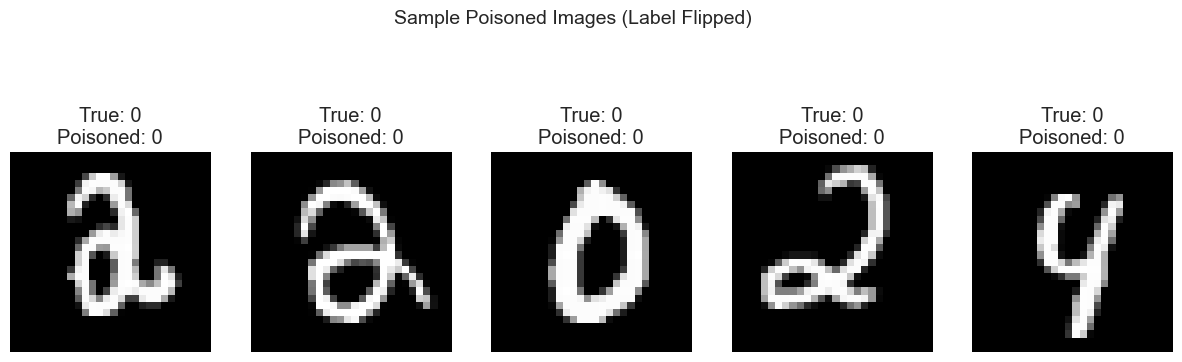


=== PHASE 3.2: TRAINING POISONED MODEL ===
🔧 Building and training poisoned model...
Epoch 1/50


c:\MachineLearningSecurityFinalProjectDirectory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7040 - loss: 0.9453 - val_accuracy: 0.9302 - val_loss: 0.3118
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8340 - loss: 0.5800 - val_accuracy: 0.9511 - val_loss: 0.2557
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8558 - loss: 0.5044 - val_accuracy: 0.9603 - val_loss: 0.2274
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8692 - loss: 0.4553 - val_accuracy: 0.9626 - val_loss: 0.2132
Epoch 5/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8743 - loss: 0.4318 - val_accuracy: 0.9644 - val_loss: 0.2143
Epoch 6/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8784 - loss: 0.4105 - val_accuracy: 0.9684 - val_loss: 0.2145
Epoch 7/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8839 - loss: 0.3898 - val_accuracy: 0.9706 - val_loss: 0.2053
Epoch 8/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8857 - loss: 0.3829 - val_accuracy: 0.9706 - val_

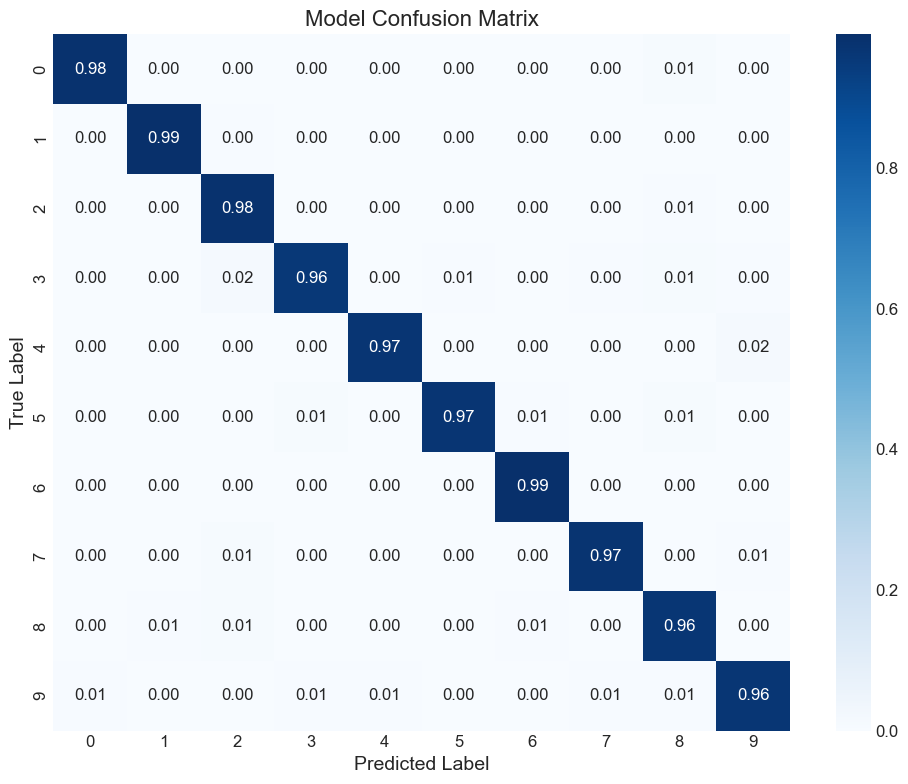

✓ Clean-test accuracy after poisoning: 0.9729523809523809
📈 Generating confusion matrix for poisoned model...
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step


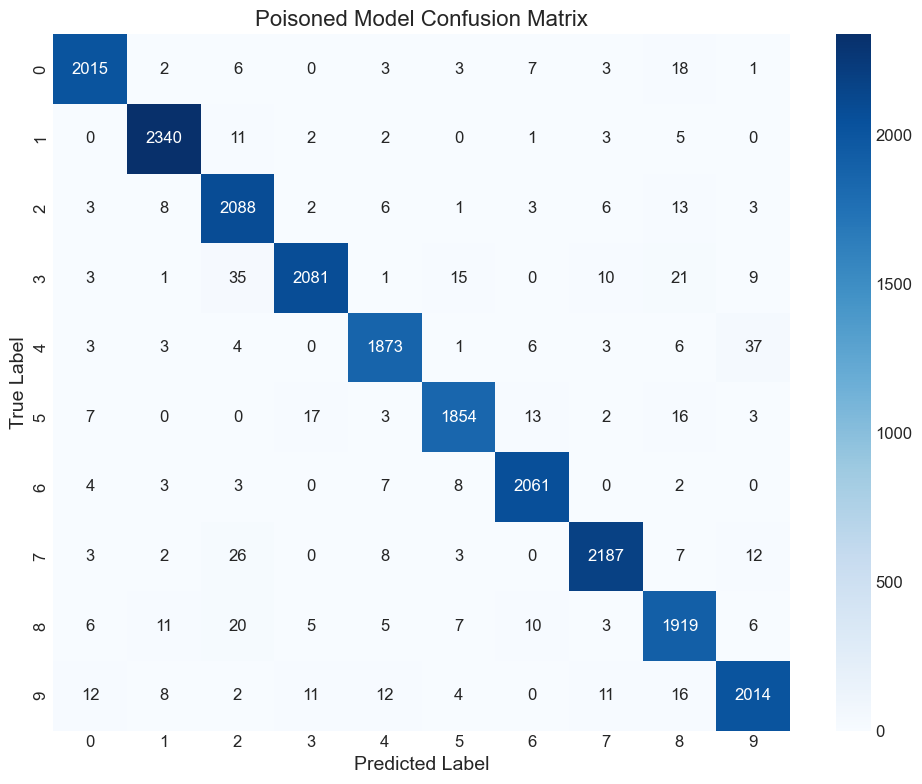

✓ Poisoned indices saved for auditing


In [9]:
# =============================================================================
# PHASE 3: TRAINING-TIME ATTACKS (DATA POISONING)
# =============================================================================

# 3.1 Label-Flip Poisoning Attack
print("=== PHASE 3.1: LABEL-FLIP POISONING ATTACK ===")

import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from scripts.train import build_model, train_model, evaluate_model
from scripts.visualize import plot_confusion_matrix
from scripts.data_poisoning import create_label_flip_poison
from scripts.save_model import save_model_and_history

# Parameters for poisoning
poison_fraction = 0.1        # 10% of training samples
target_label = 0             # class label attacker forces

print(f"🎯 Poisoning parameters:")
print(f"  - Poison fraction: {poison_fraction*100}%")
print(f"  - Target label: {target_label}")

# Generate poisoned dataset
print("\n🦠 Generating poisoned dataset...")
X_poison, y_poison, poisoned_idx = create_label_flip_poison(
    X_train, y_train, poison_fraction=poison_fraction,
    target_label=target_label, seed=42
)

print(f"✓ Poisoned {len(poisoned_idx)} samples ({len(poisoned_idx)/len(X_train)*100:.1f}%)")

# Visualize a random set of poisoned samples
import matplotlib.pyplot as plt

def visualize_poisoned_samples(X, y, poisoned_idx, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(np.random.choice(poisoned_idx, num_samples, replace=False)):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y[idx]}\nPoisoned: {target_label}")
        plt.axis('off')
    plt.suptitle("Sample Poisoned Images (Label Flipped)", fontsize=14)
    plt.show()

print("📸 Visualizing poisoned samples...")
visualize_poisoned_samples(X_poison, y_poison, poisoned_idx)

# 3.2 Training Poisoned Model
print("\n=== PHASE 3.2: TRAINING POISONED MODEL ===")

# One-hot encode labels for training
num_classes = len(np.unique(y_train))
y_poison_cat = to_categorical(y_poison, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Build and train poisoned model
print("🔧 Building and training poisoned model...")
poisoned_model = build_model(X_train.shape[1], num_classes)
poisoned_history = train_model(
    poisoned_model,
    X_poison, y_poison_cat,
    X_val, y_val_cat
)

# Save poisoned model and training history using utility
save_dir = '../models/saved'
save_model_and_history(poisoned_model, poisoned_history, save_name='poisoned_model_labelflip', save_dir=save_dir)

# Evaluate poisoned model on clean test set
print("\n📊 Evaluating poisoned model on clean test set...")
results = evaluate_model(poisoned_model, X_test, y_test_cat)
print(f"✓ Clean-test accuracy after poisoning: {results.get('accuracy', results)}")

# Display confusion matrix of poisoned model
print("📈 Generating confusion matrix for poisoned model...")
y_pred = poisoned_model.predict(X_test).argmax(axis=1)
plot_confusion_matrix(y_test, y_pred, title='Poisoned Model Confusion Matrix')

# Save poisoned indices for auditing
np.save(os.path.join(save_dir, 'poisoned_indices_labelflip.npy'), poisoned_idx)
print(f"✓ Poisoned indices saved for auditing")

=== PHASE 3.3: PERFORMANCE DEGRADATION ANALYSIS ===
📊 Analyzing performance across different datasets...
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step
Test Accuracy: 0.9730

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2058
           1       0.98      0.99      0.99      2364
           2       0.95      0.98      0.96      2133
           3       0.98      0.96      0.97      2176
           4       0.98      0.97      0.97      1936
           5       0.98      0.97      0.97      1915
           6       0.98      0.99      0.98      2088
           7       0.98      0.97      0.98      2248
           8       0.95      0.96      0.96      1992
           9       0.97      0.96      0.96      2090

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000

Confusion matrix saved to confusion_matrix.png


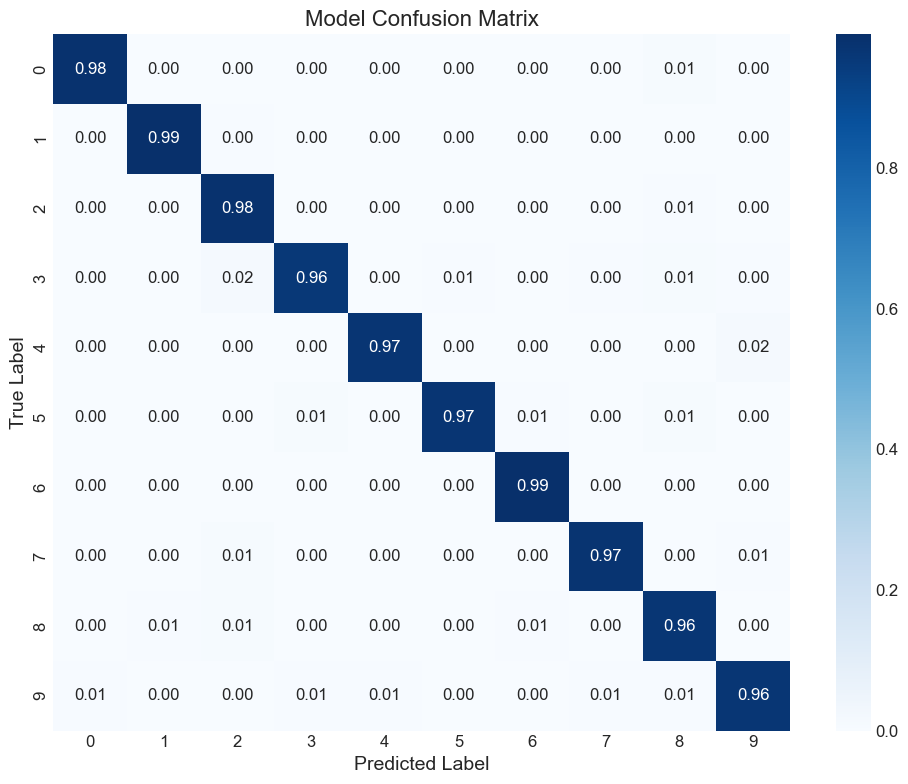

  Clean Test Set → Loss: None, Accuracy: 0.9729523809523809
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step
Test Accuracy: 0.8872

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.52      0.68      2658
           1       0.90      0.99      0.94      1409
           2       0.86      0.98      0.91      1279
           3       0.88      0.95      0.92      1229
           4       0.87      0.97      0.91      1221
           5       0.89      0.97      0.93      1154
           6       0.89      0.99      0.94      1292
           7       0.88      0.97      0.93      1325
           8       0.85      0.98      0.91      1214
           9       0.87      0.96      0.91      1220

    accuracy                           0.89     14001
   macro avg       0.89      0.93      0.90     14001
weighted avg       0.90      0.89      0.88     14001

Confusion matrix saved to confusion_matrix.png


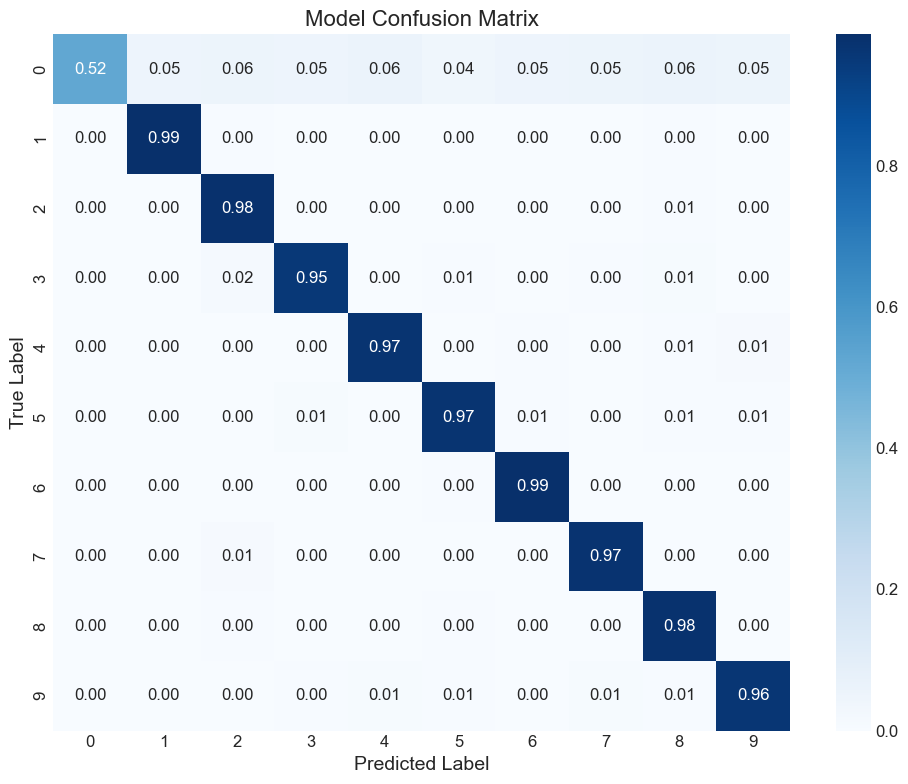

  Poisoned Validation Set → Loss: None, Accuracy: 0.8871509177915863
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step
Test Accuracy: 0.9738

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1399
           1       0.99      0.98      0.98      1551
           2       0.96      0.98      0.97      1428
           3       0.98      0.96      0.97      1365
           4       0.98      0.97      0.97      1378
           5       0.97      0.97      0.97      1256
           6       0.98      0.98      0.98      1425
           7       0.98      0.97      0.97      1473
           8       0.95      0.98      0.96      1360
           9       0.97      0.96      0.97      1366

    accuracy                           0.97     14001
   macro avg       0.97      0.97      0.97     14001
weighted avg       0.97      0.97      0.97     14001

Confusion matrix saved to confusion_matrix.png


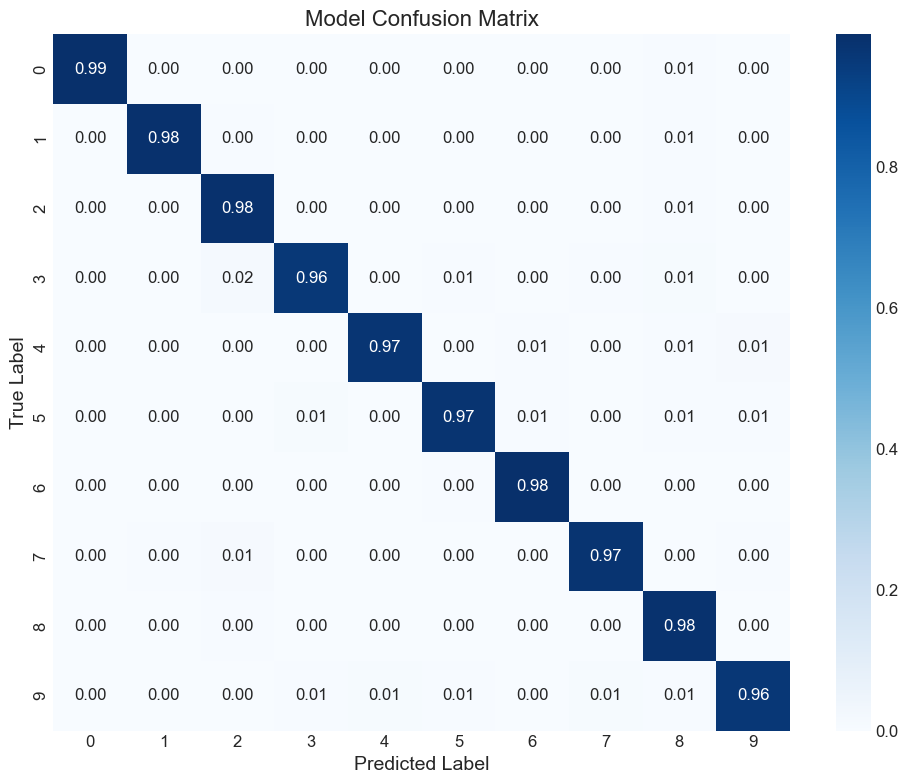

  Original Validation Set → Loss: None, Accuracy: 0.9737875866009571
✓ Performance degradation analysis completed


In [10]:
# 3.3 Performance Degradation Analysis
print("=== PHASE 3.3: PERFORMANCE DEGRADATION ANALYSIS ===")

from scripts.train import evaluate_model
from scripts.data_poisoning import create_label_flip_poison
from tensorflow.keras.utils import to_categorical

print("📊 Analyzing performance across different datasets...")

# Clean test set performance
clean_test_results = evaluate_model(poisoned_model, X_test, y_test_cat)
clean_loss = clean_test_results.get('loss')
clean_acc = clean_test_results.get('accuracy')
if clean_loss is not None and clean_acc is not None:
	print(f"  Clean Test Set → Loss: {clean_loss:.4f}, Accuracy: {clean_acc:.4f}")
else:
	print(f"  Clean Test Set → Loss: {clean_loss}, Accuracy: {clean_acc}")

# Poisoned validation set performance
X_val_poisoned, y_val_poisoned, _ = create_label_flip_poison(X_val, y_val, poison_fraction=poison_fraction, target_label=target_label, seed=42)
y_val_poisoned_cat = to_categorical(y_val_poisoned, num_classes)
poisoned_val_results = evaluate_model(poisoned_model, X_val_poisoned, y_val_poisoned_cat)
poisoned_val_loss = poisoned_val_results.get('loss')
poisoned_val_acc = poisoned_val_results.get('accuracy')

if poisoned_val_loss is not None and poisoned_val_acc is not None:
	print(f"  Poisoned Validation Set → Loss: {poisoned_val_loss:.4f}, Accuracy: {poisoned_val_acc:.4f}")
else:
	print(f"  Poisoned Validation Set → Loss: {poisoned_val_loss}, Accuracy: {poisoned_val_acc}")

# Original validation set performance
orig_val_results = evaluate_model(poisoned_model, X_val, y_val_cat)
orig_val_loss = orig_val_results.get('loss')
orig_val_acc = orig_val_results.get('accuracy')
if orig_val_loss is not None and orig_val_acc is not None:
	print(f"  Original Validation Set → Loss: {orig_val_loss:.4f}, Accuracy: {orig_val_acc:.4f}")
else:
	print(f"  Original Validation Set → Loss: {orig_val_loss}, Accuracy: {orig_val_acc}")

print("✓ Performance degradation analysis completed")

In [11]:
# =============================================================================
# PHASE 4: INFERENCE-TIME ATTACKS (ADVERSARIAL EXAMPLES)  
# =============================================================================

# 4.1 White-box Adversarial Attack (FGSM)
print("=== PHASE 4.1: WHITE-BOX ADVERSARIAL ATTACK (FGSM) ===")

# Install adversarial robustness toolbox if needed
#%pip install adversarial-robustness-toolbox

from art.attacks.evasion import FastGradientMethod 
from art.estimators.classification import KerasClassifier

print("🎯 Generating FGSM adversarial examples...")

# Wrap the poisoned model for ART
classifier = KerasClassifier(model=poisoned_model, clip_values=(0.0, 1.0))

# Generate FGSM adversarial examples (white-box)
fgsm = FastGradientMethod(estimator=classifier, eps=0.1)
X_test_adv_fgsm = fgsm.generate(x=X_test)

print("✓ FGSM adversarial examples generated successfully")

# Save adversarial examples for further evaluation
save_dir = '../adversarial_examples'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
# Save adversarial examples
np.save(os.path.join(save_dir, 'X_test_adv_fgsm.npy'), X_test_adv_fgsm)
print(f"✓ Adversarial examples saved to {save_dir}")

=== PHASE 4.1: WHITE-BOX ADVERSARIAL ATTACK (FGSM) ===


c:\MachineLearningSecurityFinalProjectDirectory\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\MachineLearningSecurityFinalProjectDirectory\.venv\Lib\site-packages\art\estimators\certification\__init__.py:30: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


🎯 Generating FGSM adversarial examples...
✓ FGSM adversarial examples generated successfully
✓ Adversarial examples saved to ../adversarial_examples


In [17]:
# 4.2 Black-box Surrogate Attack (FGSM)
print("=== PHASE 4.2: BLACK-BOX SURROGATE ATTACK (FGSM) ===")

print("🔧 Building and training surrogate model...")
# Build and train a surrogate model on the same training data (X_train, y_train_cat)
# We'll use the same architecture as the clean model for simplicity
surrogate_model = build_model(X_train.shape[1], num_classes)
surrogate_history = train_model(surrogate_model, X_train, y_train_cat, X_val, y_val_cat)

# Wrap the surrogate model for ART
surrogate_classifier = KerasClassifier(model=surrogate_model, clip_values=(0.0, 1.0))

print("🎯 Generating surrogate adversarial examples with multiple epsilon values...")
# Generate adversarial examples on the test set using FGSM with ε ≤ 0.1
epsilons = [0.05, 0.1]
X_test_adv_surrogate = {}

for eps in epsilons:
    print(f"  - Generating with ε = {eps}")
    fgsm_surrogate = FastGradientMethod(estimator=surrogate_classifier, eps=eps)
    X_test_adv = fgsm_surrogate.generate(x=X_test)
    X_test_adv_surrogate[eps] = X_test_adv
    # Save the generated adversarial examples
    np.save(os.path.join(save_dir, f'X_test_adv_surrogate_fgsm_eps{eps}.npy'), X_test_adv)

print("✓ Black-box surrogate adversarial test sets generated for ε ≤ 0.1")

# Create adversarial examples dictionary for robustness analysis
print("\n📋 Creating adversarial examples dictionary...")
X_test_adv_surrogate_fgsm_eps005 = X_test_adv_surrogate[0.05]
X_test_adv_surrogate_fgsm_eps01 = X_test_adv_surrogate[0.1]

X_adv_dict = {
    "FGSM_eps0.1": X_test_adv_fgsm,
    "Surrogate_FGSM_eps0.05": X_test_adv_surrogate_fgsm_eps005,
    "Surrogate_FGSM_eps0.1": X_test_adv_surrogate_fgsm_eps01
}

print("✓ Adversarial examples dictionary created for analysis")

=== PHASE 4.2: BLACK-BOX SURROGATE ATTACK (FGSM) ===
🔧 Building and training surrogate model...
Epoch 1/50


c:\MachineLearningSecurityFinalProjectDirectory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8036 - loss: 0.6354 - val_accuracy: 0.9376 - val_loss: 0.2169
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8036 - loss: 0.6354 - val_accuracy: 0.9376 - val_loss: 0.2169
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9285 - loss: 0.2505 - val_accuracy: 0.9542 - val_loss: 0.1539
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9285 - loss: 0.2505 - val_accuracy: 0.9542 - val_loss: 0.1539
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9471 - loss: 0.1864 - val_accuracy: 0.9617 - val_loss: 0.1268
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9471 - loss: 0.1864 - val_accuracy: 0.9617 - val_loss: 0.1268
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9573 - loss: 0.1526 - val_accuracy: 0.9678 - val_loss: 0.1163
Epoch 5/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9573 - loss: 0.1526 - val_accuracy: 0.9678 - val_

In [13]:
# 4.3 Model Loading for Analysis
print("=== PHASE 4.3: MODEL LOADING FOR ANALYSIS ===")

from tensorflow import keras

print("📂 Loading poisoned model for adversarial analysis...")
# Try loading the model as a Keras model (check for .keras or .h5 extension)
model_path = '../models/saved/poisoned_model_labelflip.keras'
if not os.path.exists(model_path):
	model_path = '../models/saved/poisoned_model_labelflip.h5'
if not os.path.exists(model_path):
	raise FileNotFoundError("Could not find poisoned model file (.keras or .h5) in ../models/saved/")

poisoned_model = keras.models.load_model(model_path)
print(f"✓ Poisoned model loaded from {model_path}")

=== PHASE 4.3: MODEL LOADING FOR ANALYSIS ===
📂 Loading poisoned model for adversarial analysis...
✓ Poisoned model loaded from ../models/saved/poisoned_model_labelflip.keras


=== PHASE 5.1: DETAILED ROBUSTNESS ANALYSIS ===
🔍 Conducting comprehensive robustness analysis...

📊 1. Analyzing per-class vulnerability...
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step


c:\MachineLearningSecurityFinalProjectDirectory\scripts\visualize.py:752: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
c:\MachineLearningSecurityFinalProjectDirectory\scripts\visualize.py:755: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Class', y='Vulnerability', data=df, ax=axes[1], palette='rocket')
c:\MachineLearningSecurityFinalProjectDirectory\scripts\visualize.py:759: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


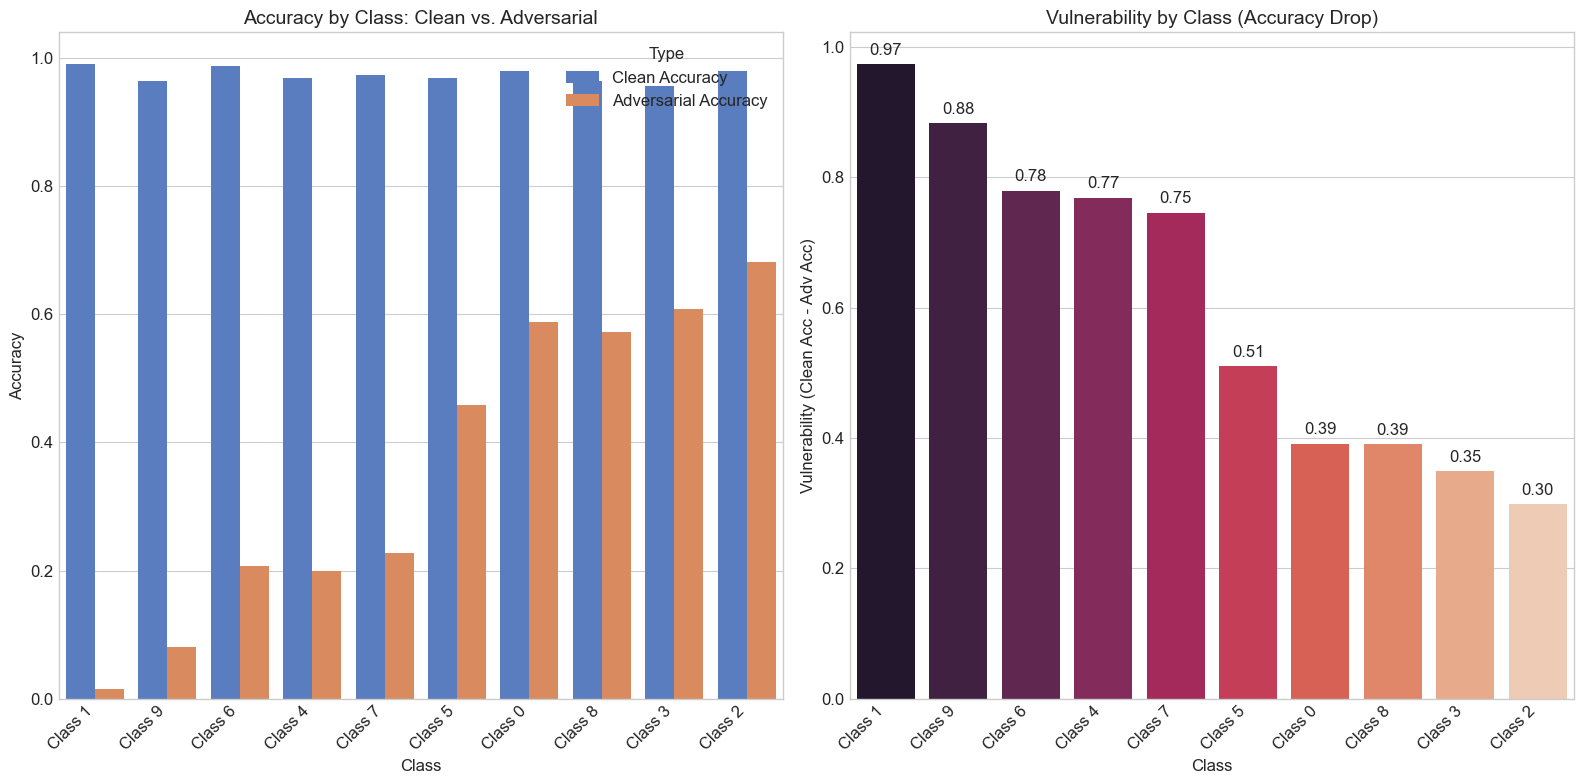


📊 2. Analyzing confidence score distributions...
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step


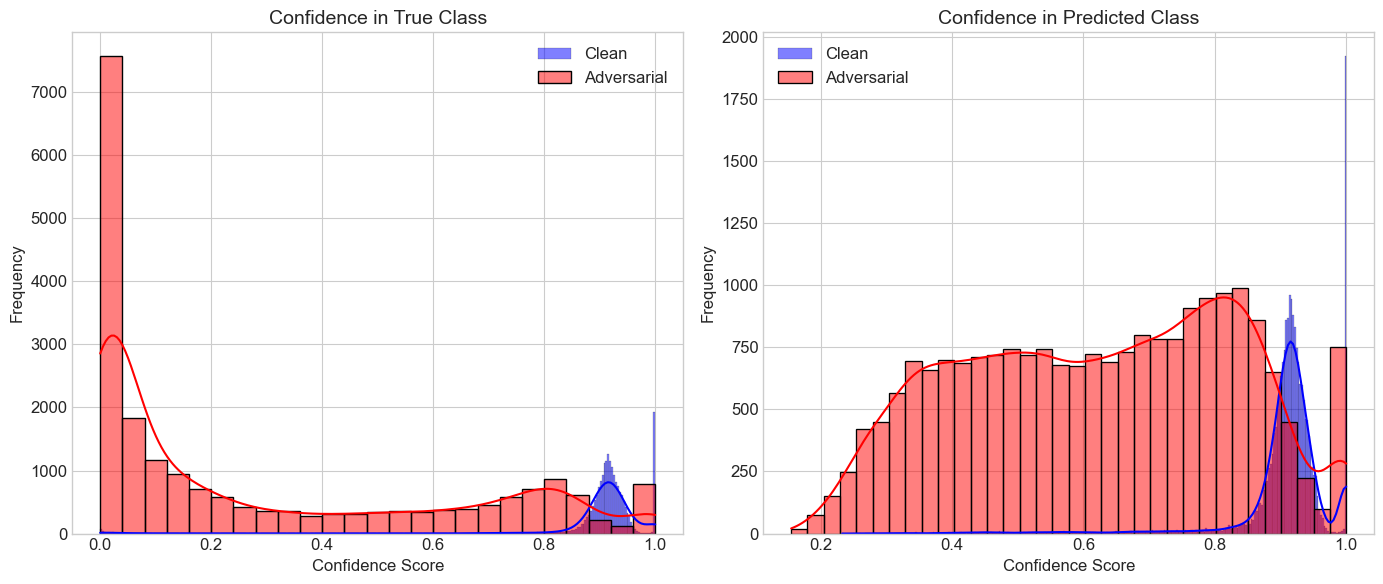


📊 3. Visualizing adversarial examples...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\MachineLearningSecurityFinalProjectDirectory\scripts\visualize.py:615: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
c:\MachineLearningSecurityFinalProjectDirectory\scripts\visualize.py:615: UserWarning: Glyph 10007 (\N{BALLOT X}) missing from font(s) Arial.
  plt.tight_layout()
c:\MachineLearningSecurityFinalProjectDirectory\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\MachineLearningSecurityFinalProjectDirectory\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10007 (\N{BALLOT X}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


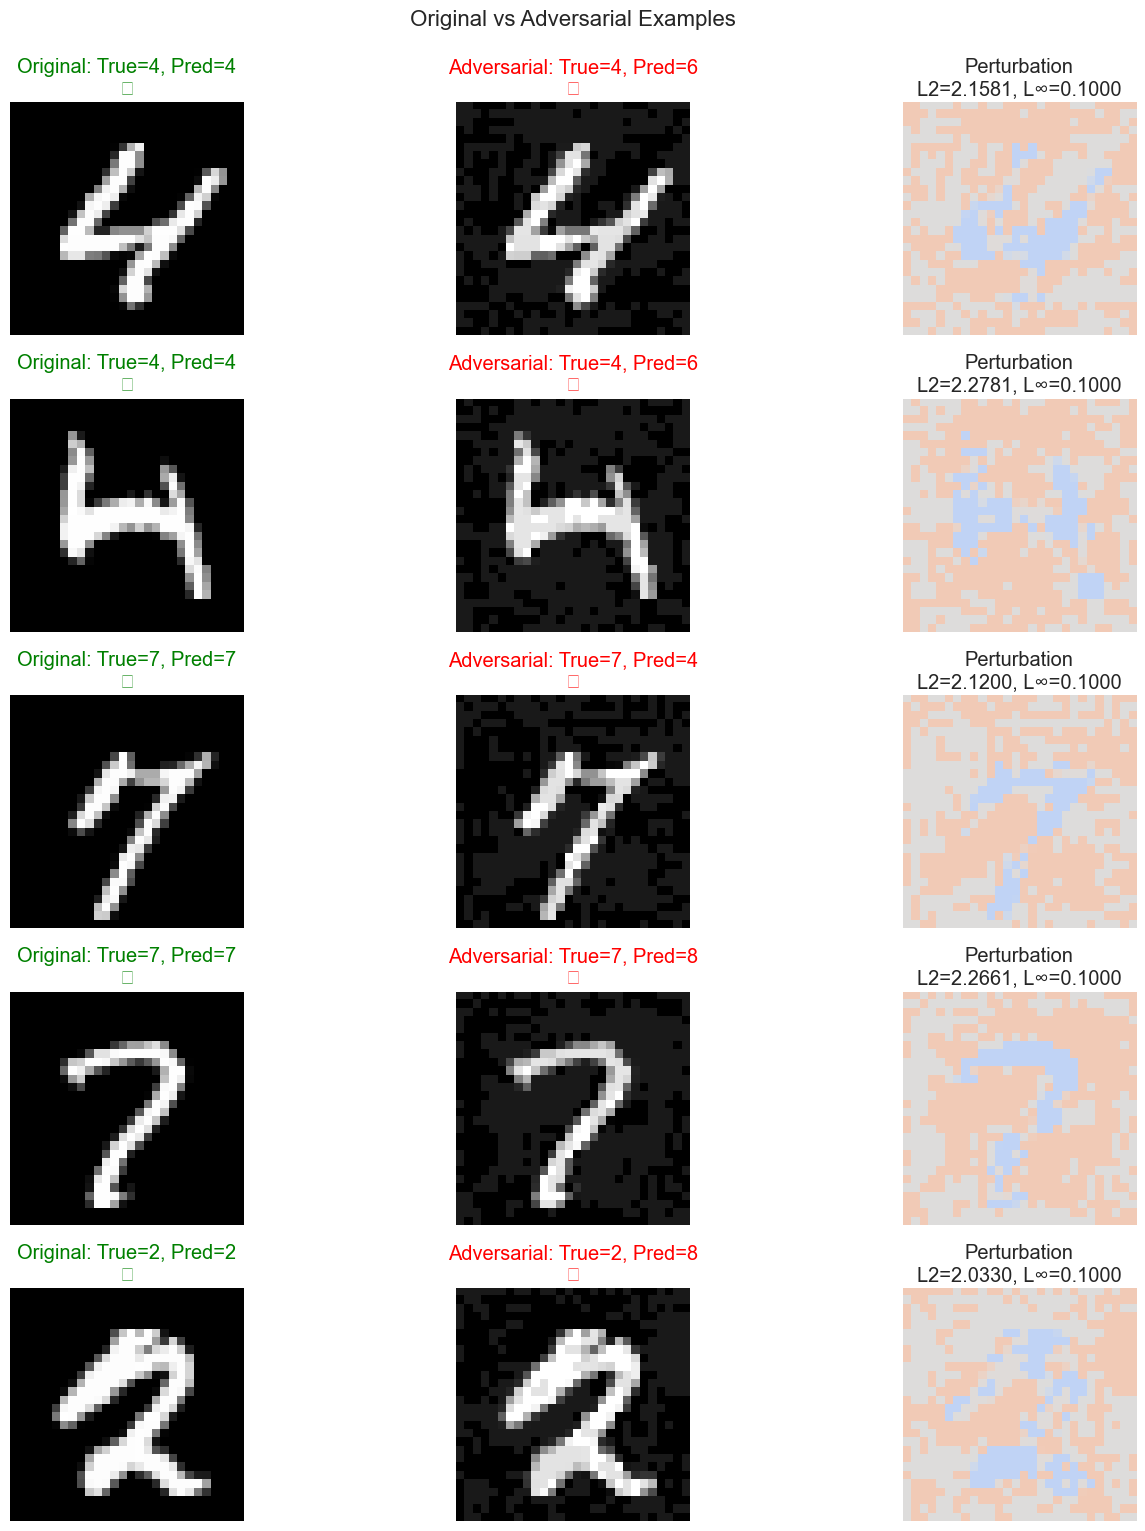


📊 4. Computing adversarial success rates...
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step
  Clean accuracy: 0.9730
  Adversarial accuracy (FGSM ε=0.1): 0.3590
  Overall adversarial success rate: 0.6140

  Per-class adversarial success rates:
    Class 0: Clean=0.979, Adv=0.588, Success Rate=0.391
    Class 1: Clean=0.990, Adv=0.016, Success Rate=0.974
    Class 2: Clean=0.979, Adv=0.681, Success Rate=0.298
    Class 3: Clean=0.956, Adv=0.608, Success Rate=0.349
    Class 4: Clean=0.967, Adv=0.199, Success Rate=0.769
    Class 5: Clean=0.968, Adv=0.458, Success Rate=0.510
    Class 6: Clean=0.987, Adv=0.207, Success Rate=0.780
    Class 7: Clean=0.973, Adv=0.227, Success Rate=0.746
    Class 8: Clean=0.963, Adv=0.573, Success Rate=0.391
    Class 9: Clean=0.964, Adv=0.081, Success Rate=0.883
✓ Detailed robustness analysis completed


In [14]:
# =============================================================================
# PHASE 5: ROBUSTNESS ANALYSIS AND EVALUATION
# =============================================================================

# 5.1 Detailed Robustness Analysis
print("=== PHASE 5.1: DETAILED ROBUSTNESS ANALYSIS ===")

from scripts.visualize import (
    plot_per_class_vulnerability,
    plot_confidence_distributions,
    plot_adversarial_examples
)

print("🔍 Conducting comprehensive robustness analysis...")

# 1. PER-CLASS VULNERABILITY ANALYSIS
print("\n📊 1. Analyzing per-class vulnerability...")
plot_per_class_vulnerability(
    model=poisoned_model,
    X_clean=X_test,
    X_adv=X_test_adv_fgsm,
    y_true=y_test,
    class_names=[f"Class {i}" for i in range(num_classes)]
)

# 2. CONFIDENCE SCORE DISTRIBUTIONS
print("\n📊 2. Analyzing confidence score distributions...")
plot_confidence_distributions(
    model=poisoned_model,
    X_clean=X_test,
    X_adv=X_test_adv_fgsm,
    y_true=y_test
)

# 3. ADVERSARIAL EXAMPLES VISUALIZATION
print("\n📊 3. Visualizing adversarial examples...")
plot_adversarial_examples(
    X_orig=X_test,
    X_adv=X_test_adv_fgsm,
    y_true=y_test,
    model=poisoned_model,
    n_samples=5
)

# 4. ADVERSARIAL SUCCESS RATE CALCULATION
print("\n📊 4. Computing adversarial success rates...")

# Overall accuracy drop
y_pred_clean = np.argmax(poisoned_model.predict(X_test), axis=1)
y_pred_adv = np.argmax(poisoned_model.predict(X_test_adv_fgsm), axis=1)

clean_acc = np.mean(y_pred_clean == y_test)
adv_acc = np.mean(y_pred_adv == y_test)
overall_success_rate = clean_acc - adv_acc

print(f"  Clean accuracy: {clean_acc:.4f}")
print(f"  Adversarial accuracy (FGSM ε=0.1): {adv_acc:.4f}")
print(f"  Overall adversarial success rate: {overall_success_rate:.4f}")

# Per-class success rates
print("\n  Per-class adversarial success rates:")
for c in range(num_classes):
    # Get indices for this class
    idx = (y_test == c)
    if np.sum(idx) > 0:
        clean_acc_c = np.mean(y_pred_clean[idx] == c)
        adv_acc_c = np.mean(y_pred_adv[idx] == c)
        success_rate_c = clean_acc_c - adv_acc_c
        print(f"    Class {c}: Clean={clean_acc_c:.3f}, Adv={adv_acc_c:.3f}, Success Rate={success_rate_c:.3f}")

print("✓ Detailed robustness analysis completed")

=== PHASE 5.2: COMPREHENSIVE ROBUSTNESS SUMMARY ===
📈 Generating comprehensive robustness summary report...
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 

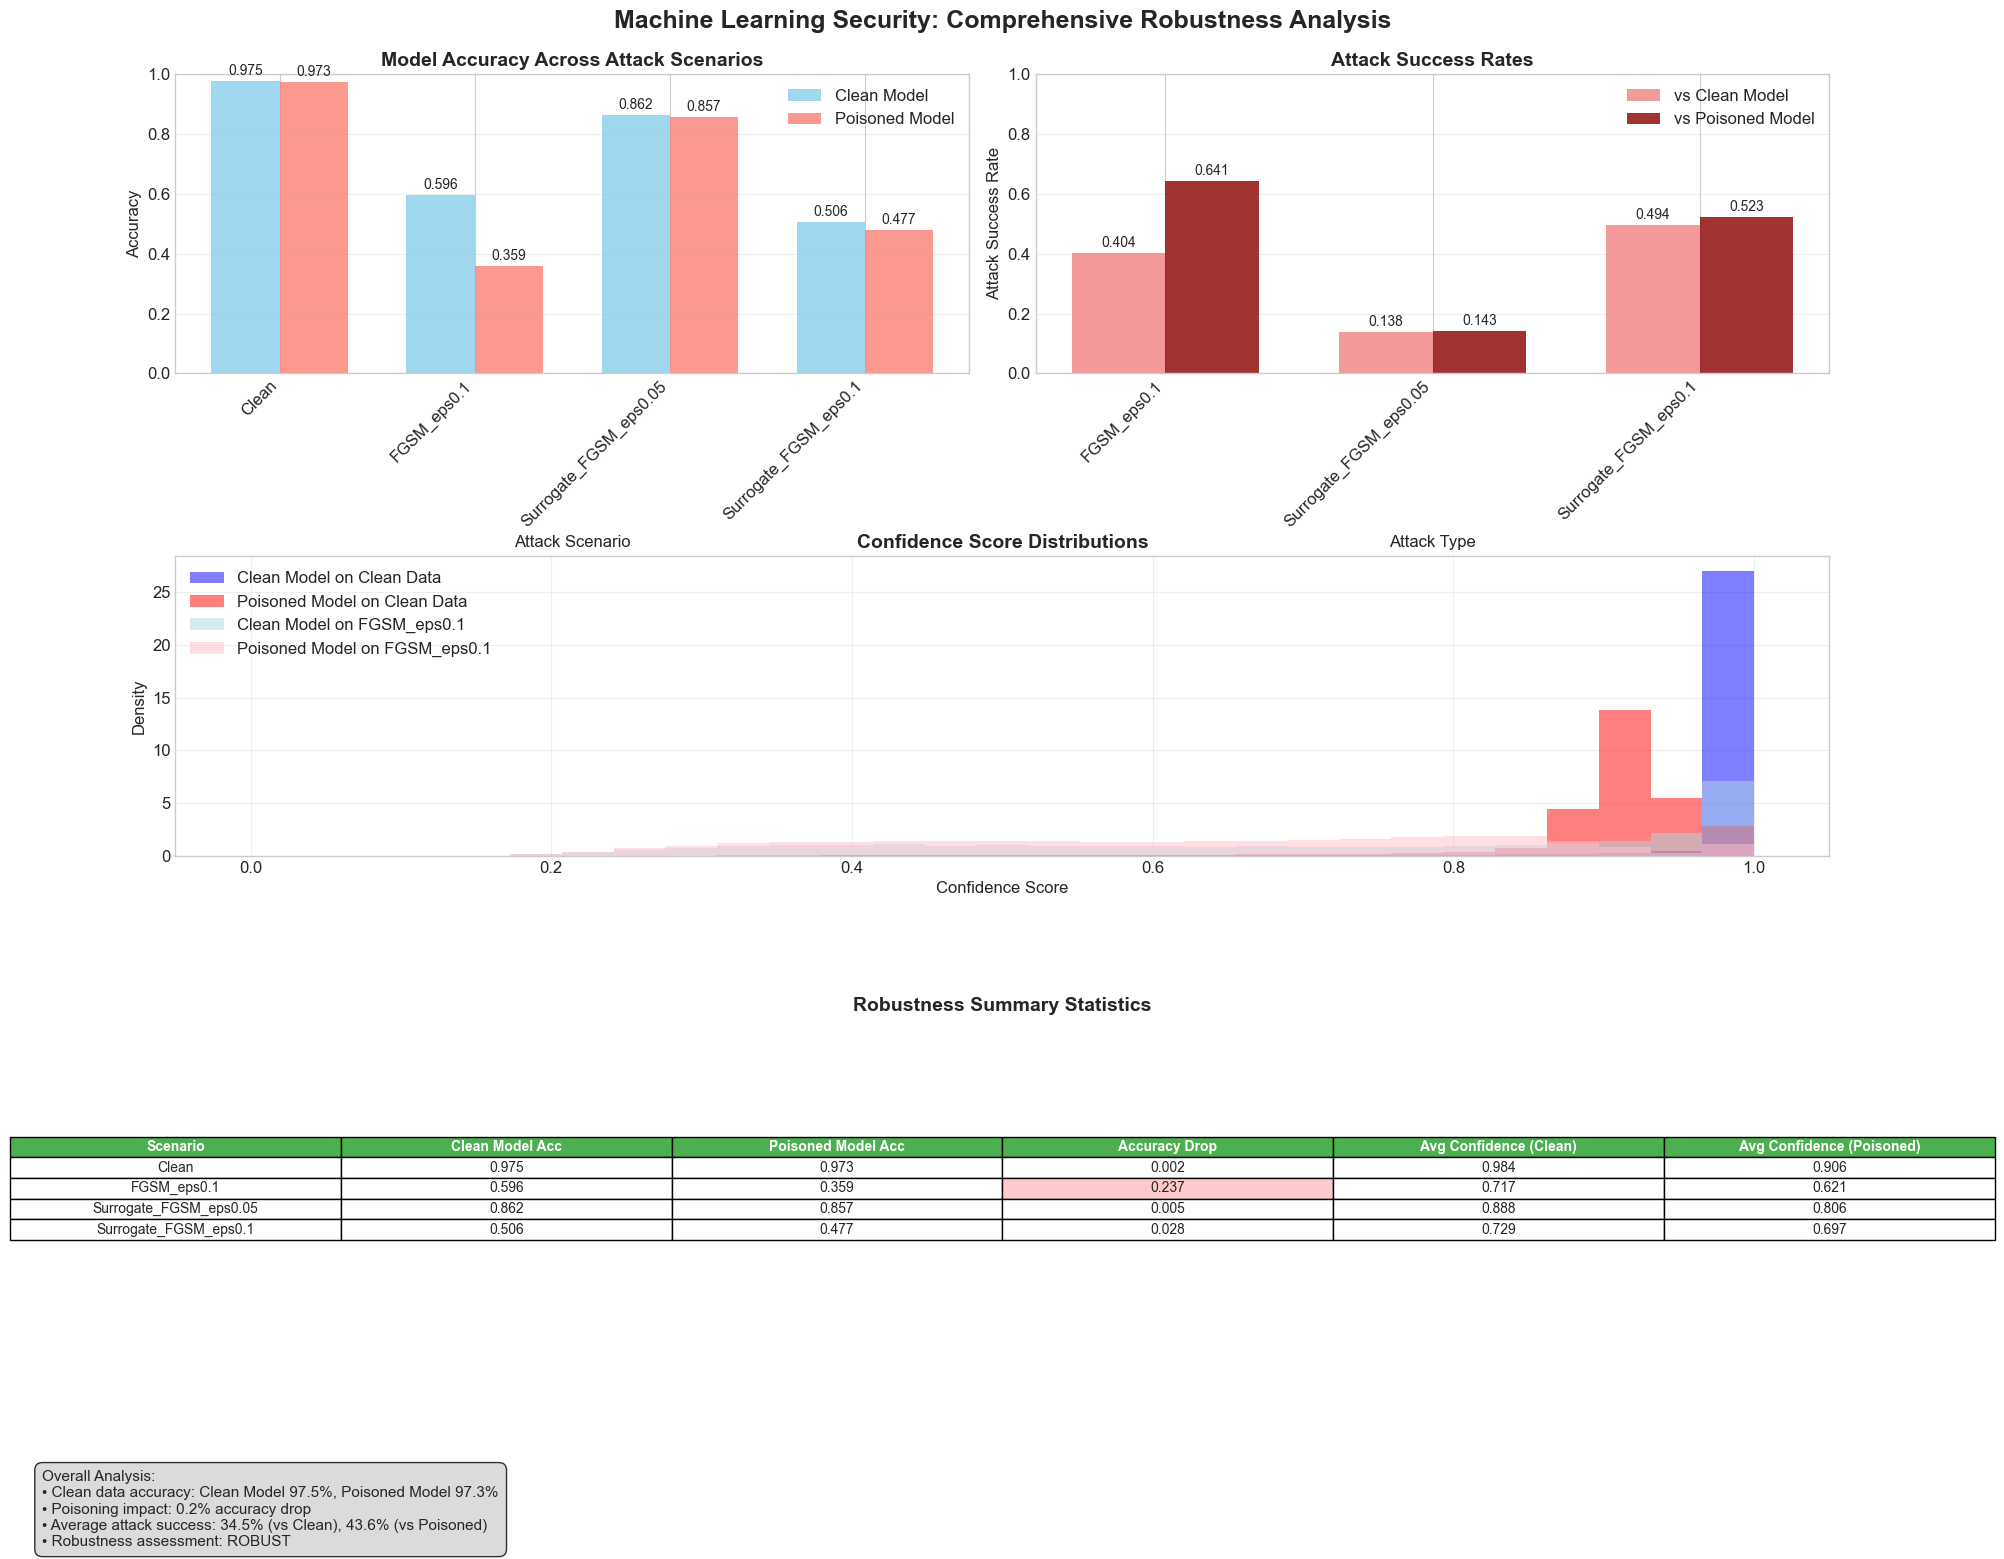

✓ Comprehensive robustness summary completed


In [18]:
# 5.2 Comprehensive Robustness Summary
print("=== PHASE 5.2: COMPREHENSIVE ROBUSTNESS SUMMARY ===")

from scripts.visualize import plot_robustness_summary

print("📈 Generating comprehensive robustness summary report...")

# Generate comprehensive robustness analysis
plot_robustness_summary(
    clean_model=clean_model,
    poisoned_model=poisoned_model,
    X_test=X_test,
    y_test=y_test,
    X_adv_dict=X_adv_dict,  # Now using the properly defined dictionary
    save_path=None  # Set to filepath if you want to save the figure
)

print("✓ Comprehensive robustness summary completed")